### features:
* spectogram coef
* zero crossing rate
* selected chromogram values
* selected tempogram values
* wavelet levels

In [1]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
import itertools

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/MV"

## Load data

Here, our target is to predict disease of patients with multiple diseases. So; our y will be disease column of two column indicatin geach patients disease.

In [3]:
present_df = pd.read_csv(path + "/present/present_MV_p_features.csv", index_col = 0) #1080, 18657
#present_df

,freq_0,freq_1,freq_2,freq_3,freq_4,freq_5,freq_6,freq_7,freq_8,freq_9,...,tempogram_177,tempogram_179,tempogram_180,tempogram_181,tempogram_182,tempogram_183,tempogram_184,tempogram_189,tempogram_190,tempogram_191
0,3.565702e-11,5.058110e-11,5.009728e-11,4.895926e-11,4.722786e-11,4.500613e-11,4.242970e-11,3.966712e-11,3.708980e-11,3.708926e-11,...,5.935937e-18,1.662298e-17,3.058823e-17,4.257155e-17,1.599420e-18,2.954374e-17,2.787757e-17,2.079163e-17,1.414332e-17,2.889118e-17
1,5.134365e-11,7.243118e-11,7.189839e-11,7.103701e-11,6.990488e-11,6.861625e-11,6.737140e-11,6.641766e-11,6.575817e-11,6.519725e-11,...,-5.254064e-18,1.822149e-18,5.966399e-18,6.824811e-18,-1.274840e-17,1.245525e-18,4.397453e-18,3.463668e-18,2.908491e-18,1.156050e-17
2,2.742123e-11,3.922052e-11,3.971625e-11,4.018998e-11,4.085918e-11,4.177337e-11,4.266612e-11,4.347156e-11,4.415444e-11,4.468334e-11,...,-1.399242e-18,1.518069e-17,2.112637e-17,3.021586e-17,3.636606e-18,1.548249e-17,1.490537e-17,1.172312e-17,1.392197e-17,3.309639e-17
3,7.253805e-11,1.041101e-10,1.063940e-10,1.085748e-10,1.104742e-10,1.120098e-10,1.131441e-10,1.138754e-10,1.142270e-10,1.142320e-10,...,3.116256e-18,6.818597e-18,1.140233e-17,1.925106e-17,6.424538e-18,6.027065e-18,3.647587e-18,1.401124e-17,5.493047e-18,1.249725e-17
4,2.953180e-11,4.238516e-11,4.372856e-11,4.530598e-11,4.697467e-11,4.870685e-11,5.050376e-11,5.234866e-11,5.417679e-11,5.591282e-11,...,-7.287605e-19,8.725804e-18,1.947595e-17,2.591243e-17,3.190898e-18,1.619882e-17,1.861592e-17,1.739028e-17,1.523477e-17,2.122196e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.166323e-10,1.695751e-10,1.785708e-10,1.880550e-10,1.965457e-10,2.034097e-10,2.084664e-10,2.118851e-10,2.141929e-10,2.162313e-10,...,-2.756389e-18,7.919038e-18,1.114470e-17,2.350613e-17,-1.727700e-19,3.071198e-18,1.276759e-19,8.789764e-18,5.328876e-18,1.366309e-17
1076,1.330582e-10,1.908228e-10,1.972918e-10,2.059115e-10,2.154406e-10,2.249094e-10,2.336467e-10,2.413569e-10,2.483390e-10,2.560687e-10,...,-2.642670e-18,3.961560e-18,1.011196e-17,2.483538e-17,-3.921357e-18,1.807005e-18,-2.634816e-18,2.755519e-18,5.315982e-18,1.457212e-17
1077,1.971183e-10,2.801003e-10,2.822917e-10,2.837147e-10,2.838144e-10,2.823869e-10,2.794099e-10,2.750574e-10,2.697999e-10,2.648555e-10,...,9.801412e-19,1.039517e-17,2.379334e-17,2.607605e-17,2.261629e-18,1.203609e-17,-2.183155e-19,1.435194e-17,1.608025e-17,2.572093e-17
1078,2.030124e-10,2.879313e-10,2.892743e-10,2.899291e-10,2.892023e-10,2.868329e-10,2.829544e-10,2.780129e-10,2.726470e-10,2.675961e-10,...,-8.669065e-19,1.459451e-17,2.212606e-17,2.606953e-17,4.050412e-18,8.375194e-18,-3.074482e-18,1.030202e-17,6.865534e-18,1.954120e-17


In [4]:
absent_df = pd.read_csv(path + "/absent/absent_MV_p_features.csv", index_col = 0) #5534, 18657
#absent_df

,freq_0,freq_1,freq_2,freq_3,freq_4,freq_5,freq_6,freq_7,freq_8,freq_9,...,tempogram_177,tempogram_179,tempogram_180,tempogram_181,tempogram_182,tempogram_183,tempogram_184,tempogram_189,tempogram_190,tempogram_191
0,2.165077e-10,3.103650e-10,3.151707e-10,3.184995e-10,3.198247e-10,3.191150e-10,3.166337e-10,3.127556e-10,3.078004e-10,3.019188e-10,...,-7.558712e-18,8.881303e-18,1.226240e-17,2.876893e-17,2.769808e-18,3.511265e-18,6.125523e-18,3.703873e-18,5.864886e-18,1.721646e-17
1,9.141214e-11,1.304823e-10,1.332101e-10,1.363941e-10,1.395026e-10,1.422870e-10,1.446960e-10,1.467967e-10,1.485089e-10,1.496221e-10,...,-7.608213e-18,2.024985e-18,1.198150e-17,2.692457e-17,8.572301e-19,4.563777e-18,6.168332e-18,-7.563666e-20,8.761011e-19,2.187206e-17
2,9.137861e-11,1.288409e-10,1.278453e-10,1.262128e-10,1.238255e-10,1.208635e-10,1.176868e-10,1.148309e-10,1.128987e-10,1.122617e-10,...,-1.340125e-17,-8.862036e-19,4.303618e-18,1.323874e-17,-6.461911e-18,-9.164754e-19,-1.944394e-18,-8.087708e-19,-2.378779e-18,1.294100e-17
3,9.299888e-11,1.329157e-10,1.346376e-10,1.363390e-10,1.377334e-10,1.387209e-10,1.393757e-10,1.395881e-10,1.390358e-10,1.375508e-10,...,-1.702228e-17,4.254916e-18,2.493385e-18,2.949106e-17,-8.248314e-18,-2.100573e-18,1.001339e-17,1.071327e-17,-6.297283e-18,2.182968e-17
4,2.073862e-10,2.938252e-10,2.947733e-10,2.950329e-10,2.939452e-10,2.913325e-10,2.873235e-10,2.821691e-10,2.760972e-10,2.692619e-10,...,3.649425e-18,1.663012e-17,1.903220e-17,3.275425e-17,3.417346e-18,2.100302e-17,1.865083e-17,1.795777e-17,1.988328e-17,3.330436e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,4.824107e-11,6.950623e-11,7.095686e-11,7.179961e-11,7.196180e-11,7.149615e-11,7.055520e-11,6.941273e-11,6.849888e-11,6.833678e-11,...,-3.005152e-18,1.466695e-17,2.596007e-17,3.986347e-17,4.000338e-18,1.069460e-17,2.255462e-17,1.207900e-17,1.673356e-17,3.432281e-17
5530,7.005301e-11,1.003706e-10,1.023822e-10,1.043841e-10,1.061482e-10,1.075252e-10,1.084353e-10,1.090679e-10,1.095517e-10,1.095959e-10,...,-9.845978e-18,3.467915e-19,1.209071e-17,1.929906e-17,-2.771410e-18,6.768013e-18,1.128486e-17,1.374200e-17,1.168831e-17,1.938284e-17
5531,5.708331e-11,8.215659e-11,8.477646e-11,8.743427e-11,8.952905e-11,9.072320e-11,9.085287e-11,8.988971e-11,8.791742e-11,8.511318e-11,...,-3.763499e-19,2.715407e-17,3.249451e-17,5.311473e-17,3.166313e-18,3.959435e-17,3.266311e-17,2.861009e-17,2.422145e-17,4.513052e-17
5532,3.826129e-11,5.469257e-11,5.616497e-11,5.799486e-11,5.980505e-11,6.159040e-11,6.333649e-11,6.471250e-11,6.558026e-11,6.594482e-11,...,-1.692011e-17,1.145886e-17,1.270341e-17,2.439161e-17,-9.306662e-18,-6.599508e-19,1.031294e-17,3.978752e-18,2.924161e-18,1.749356e-17


### create labels

In [5]:
y = np.concatenate((np.ones(1080), np.zeros(5534)), axis =0)
y.shape

(6614,)

## concat features

In [6]:
df = pd.concat([present_df, absent_df], axis = 0) #6614, 18657
#df

,freq_0,freq_1,freq_2,freq_3,freq_4,freq_5,freq_6,freq_7,freq_8,freq_9,...,tempogram_177,tempogram_179,tempogram_180,tempogram_181,tempogram_182,tempogram_183,tempogram_184,tempogram_189,tempogram_190,tempogram_191
0,3.565702e-11,5.058110e-11,5.009728e-11,4.895926e-11,4.722786e-11,4.500613e-11,4.242970e-11,3.966712e-11,3.708980e-11,3.708926e-11,...,5.935937e-18,1.662298e-17,3.058823e-17,4.257155e-17,1.599420e-18,2.954374e-17,2.787757e-17,2.079163e-17,1.414332e-17,2.889118e-17
1,5.134365e-11,7.243118e-11,7.189839e-11,7.103701e-11,6.990488e-11,6.861625e-11,6.737140e-11,6.641766e-11,6.575817e-11,6.519725e-11,...,-5.254064e-18,1.822149e-18,5.966399e-18,6.824811e-18,-1.274840e-17,1.245525e-18,4.397453e-18,3.463668e-18,2.908491e-18,1.156050e-17
2,2.742123e-11,3.922052e-11,3.971625e-11,4.018998e-11,4.085918e-11,4.177337e-11,4.266612e-11,4.347156e-11,4.415444e-11,4.468334e-11,...,-1.399242e-18,1.518069e-17,2.112637e-17,3.021586e-17,3.636606e-18,1.548249e-17,1.490537e-17,1.172312e-17,1.392197e-17,3.309639e-17
3,7.253805e-11,1.041101e-10,1.063940e-10,1.085748e-10,1.104742e-10,1.120098e-10,1.131441e-10,1.138754e-10,1.142270e-10,1.142320e-10,...,3.116256e-18,6.818597e-18,1.140233e-17,1.925106e-17,6.424538e-18,6.027065e-18,3.647587e-18,1.401124e-17,5.493047e-18,1.249725e-17
4,2.953180e-11,4.238516e-11,4.372856e-11,4.530598e-11,4.697467e-11,4.870685e-11,5.050376e-11,5.234866e-11,5.417679e-11,5.591282e-11,...,-7.287605e-19,8.725804e-18,1.947595e-17,2.591243e-17,3.190898e-18,1.619882e-17,1.861592e-17,1.739028e-17,1.523477e-17,2.122196e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,4.824107e-11,6.950623e-11,7.095686e-11,7.179961e-11,7.196180e-11,7.149615e-11,7.055520e-11,6.941273e-11,6.849888e-11,6.833678e-11,...,-3.005152e-18,1.466695e-17,2.596007e-17,3.986347e-17,4.000338e-18,1.069460e-17,2.255462e-17,1.207900e-17,1.673356e-17,3.432281e-17
5530,7.005301e-11,1.003706e-10,1.023822e-10,1.043841e-10,1.061482e-10,1.075252e-10,1.084353e-10,1.090679e-10,1.095517e-10,1.095959e-10,...,-9.845978e-18,3.467915e-19,1.209071e-17,1.929906e-17,-2.771410e-18,6.768013e-18,1.128486e-17,1.374200e-17,1.168831e-17,1.938284e-17
5531,5.708331e-11,8.215659e-11,8.477646e-11,8.743427e-11,8.952905e-11,9.072320e-11,9.085287e-11,8.988971e-11,8.791742e-11,8.511318e-11,...,-3.763499e-19,2.715407e-17,3.249451e-17,5.311473e-17,3.166313e-18,3.959435e-17,3.266311e-17,2.861009e-17,2.422145e-17,4.513052e-17
5532,3.826129e-11,5.469257e-11,5.616497e-11,5.799486e-11,5.980505e-11,6.159040e-11,6.333649e-11,6.471250e-11,6.558026e-11,6.594482e-11,...,-1.692011e-17,1.145886e-17,1.270341e-17,2.439161e-17,-9.306662e-18,-6.599508e-19,1.031294e-17,3.978752e-18,2.924161e-18,1.749356e-17


## Without threshold

In [8]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(df, y , train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [9]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective= "binary:logistic", eval_metric = "logloss")


In [10]:
clf.fit(X_train_, y_train_)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [11]:
yhat = clf.predict(X_valid_)

In [12]:
yhat.shape

(1323,)

In [13]:
y_valid_.shape

(1323,)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_, yhat)
print("accuracy: %.2f%%" % (accuracy * 100.0))

accuracy: 85.71%


In [15]:
from sklearn.metrics import recall_score
recall = recall_score(y_valid_, yhat, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))


recall: 85.71%


In [16]:
from sklearn.metrics import precision_score
precision = precision_score(y_valid_, yhat, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

precision: 86.03%


/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


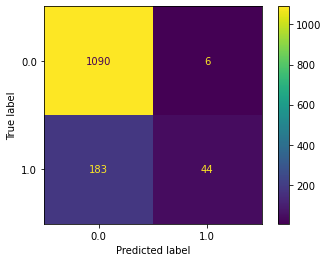

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_valid_, y_valid_) 